In [1]:
# Código fornecido pelo Professor Doutor Ivanovitch Medeiros Dantas da Silva
# Suba o arquivo "votacao_candidato_munzona_2018_BR"

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving votacao_candidato_munzona_2018_BR.csv to votacao_candidato_munzona_2018_BR.csv
User uploaded file "votacao_candidato_munzona_2018_BR.csv" with length 33446861 bytes


# 1 - Configurando a base de dados

Inicialmente, precisamos importar as bibliotecas necessárias para a análise e visualização dos dados. Para esta tarefa, utilizaremos **NumPy**, **Pandas**, **Matplotlib** e **Seaborn**.

Após a importação, é necessário carregar o arquivo como um dataframe do **Pandas**.

As colunas tem a seguinte informação:

* **DT_GERACAO** - Data de extração dos dados para geração dos arquivos;
* **HH_GERACAO** - Hora de extração dos dados para geração dos arquivos (horário de Brasília);
* **ANO_ELEICAO** - Ano da eleição;
* **CD_TIPO_ELEICAO** - Código do tipo de eleição;
* **NM_TIPO_ELEICAO** - Nome do tipo de eleição;
* **NR_TURNO** - Número do turno da eleição;
* **CD_ELEICAO** - Código da eleição;
* **DS_ELEICAO** - Descrição da eleição;
* **DT_ELEICAO** - Data em que ocorreu a eleição;
* **TP_ABRANGENCIA** - Tipo de abrangência da eleição;
* **SG_UF** - Sigla da Unidade da Federação em que ocorreu a eleição;
* **SG_UE** - Sigla da Unidade Eleitoral do candidato (em caso de eleição majoritária é a sigla da UF que o candidato concorre e em caso de eleição municipal é o código TSE do município);
* **NM_UE** - Nome da Unidade Eleitoral do candidato (em caso de eleição majoritária é o nome da UF que o candidato concorre e em caso de eleição municipal é o nome do município);
* **CD_MUNICIPIO** - Código TSE do município onde ocorreu a eleição;
* **NM_MUNICIPIO** - Nome do município onde ocorreu a eleição;
* **NR_ZONA** - Número da Zona Eleitoral onde ocorreu a eleição;
* **CD_CARGO** - Código do cargo do candidato;
* **DS_CARGO** - Descrição do cargo do candidato;
* **SQ_CANDIDATO** - Número sequencial do candidato gerado internamente pelos sistemas eleitorais (não é o número de campanha do candidato).
* **NR_CANDIDATO** - Número do candidato na urna;
* **NM_CANDIDATO** - Nome completo do candidato;
* **NM_URNA_CANDIDATO** - Nome de urna do candidato;
* **NM_SOCIAL_CANDIDATO** - Nome social do candidato;
* **CD_SITUACAO_CANDIDATURA** - Código da situação do registro de candidatura do candidato;
* **DS_SITUACAO_CANDIDATURA** - Descrição da situação do registro de candidatura do candidato (pode assumir os valores 'Apto'	[candidato apto para ir para urna], 'Inapto' [candidato inapto para ir para urna], 'Cadastrado' [registro de candidatura realizada, mas ainda não julgada]);
* **CD_DETALHE_SITUACAO_CAND** - Código do detalhe da situação do registro de candidatura do candidato;
* **DS_DETALHE_SITUACAO_CAND** - Descrição do detalhe da situação do registro de candidatura;
* **TP_AGREMIACAO** - Tipo de agremiação (pode assumir os valores 'Coligação' quando o candidato concorre por coligação e 'Partido isolado' quando o candidato concorre somente pelo partido);
* **NR_PARTIDO** - Número do partido do candidato;
* **SG_PARTIDO** - Sigla do partido do candidato;
* **NM_PARTIDO** - Nome do partido do candidato;
* **SQ_COLIGACAO** - Sequencial da coligação gerado pela Justiça Eleitoral, da qual o candidato pertence;
* **NM_COLIGACAO** - Nome da coligação da qual o candidato pertence;
* **DS_COMPOSICAO_COLIGACAO** - Descrição da composição da coligação da qual o candidato pertence;
* **CD_SIT_TOT_TURNO** - Código da situação de totalização do candidato naquele turno;
* **DS_SIT_TOT_TURNO** - Descrição da situação de totalização do candidato naquele turno;
* **ST_VOTO_EM_TRANSITO** - O indicativo se o quantitativo de votos se refere a voto em trânsito (pode assumir os valores S para Sim e N para Não);
* **QT_VOTOS_NOMINAIS** - Quantidade total de votos nominais do candidato naquele município e zona.







In [98]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configurando preferências para visualização dos gráficos gerados pelo Seaborn.
sns.set_style("white")

# Escolhendo o contexto de apresentação
sns.set_context("notebook")

# Lendo o dataset para o Pandas e exibindo as 5 primeiras linhas
presidentes_dataset = pd.read_csv("votacao_candidato_munzona_2018_BR.csv", sep=";", encoding='latin-1')
presidentes_dataset.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,50,PSOL,Partido Socialismo e Liberdade,280000050035,VAMOS SEM MEDO DE MUDAR O BRASIL,PSOL / PCB,4,NÃO ELEITO,N,10
1,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,51,PATRI,Patriota,280000050072,PARTIDO ISOLADO,PATRI,4,NÃO ELEITO,N,33
2,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,18,REDE,Rede Sustentabilidade,280000050589,UNIDOS PARA TRANSFORMAR O BRASIL,REDE / PV,4,NÃO ELEITO,N,691
3,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,18,REDE,Rede Sustentabilidade,280000050589,UNIDOS PARA TRANSFORMAR O BRASIL,REDE / PV,4,NÃO ELEITO,N,5
4,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,45,PSDB,Partido da Social Democracia Brasileira,280000050070,PARA UNIR O BRASIL,PSDB / PTB / PP / PR / DEM / SOLIDARIEDADE / P...,4,NÃO ELEITO,N,1346


# 2 - Tratando a base

Para realizar uma análise sobre os votos dos presidenciáveis, é necessário tratar as informações. Inicialmente iremos criar variáveis para armazenar o número de presidentes distintos que estão concorrendo e sua quantidade de votos dividida por estados.

## 2.1 - Candidatos

Para descobrir quantos candidatos concorreram, podemos fazer da seguinte forma:

In [99]:
# Conta quantos candidatos concorreram no primeiro turno

presidentes_counts = presidentes_dataset["NM_URNA_CANDIDATO"].nunique()
presidentes_counts

13

Após sabermos que existem 13 candidatos, podemos criar uma lista com o nome deles para futura referência. Isso é feito executando:

In [100]:
# Pega uma lista com o nome de todos os presidenciáveis

presidentes_unique = presidentes_dataset["NM_URNA_CANDIDATO"].unique()
presidentes_unique

array(['GUILHERME BOULOS', 'CABO DACIOLO', 'MARINA SILVA',
       'GERALDO ALCKMIN', 'JAIR BOLSONARO', 'CIRO GOMES', 'ALVARO DIAS',
       'JOÃO GOULART FILHO', 'FERNANDO HADDAD', 'JOÃO AMOÊDO',
       'HENRIQUE MEIRELLES', 'EYMAEL', 'VERA'], dtype=object)

Com isso em mente, já podemos adiantar que iremos necessitar de 13 cores distintas para representar graficamente cada um desses candidatos. Escolhi todas essas cores do catálogo demonstrado nesta [lista](http://tableaufriction.blogspot.com.br/2012/11/finally-you-can-use-tableau-data-colors.html) contendo cores "amigáveis" para daltônicos.

In [0]:
# Criando um array com 13 cores amigáveis para daltônicos
cores_amigaveis = [
    (31/255,119/255,180/255), (152/255,223/255,138/255), (140/255,86/255,75/255),
    (199/255,199/255,199/255), (174/255,199/255,232/255), (214/255,39/255,40/255),
    (196/255,156/255,148/255), (188/255,189/255,34/255), (255/255,127/255,14/255),
    (255/255,152/255,150/255), (227/255,119/255,194/255), (219/255,219/255,141/255),
    (44/255,160/255,44/255)
]

# Paleta de cores para ser utilizado pelo Seaborn.
# TODO: utilizar apenas cores amigáveis para daltônicos, substituindo o array anterior.
my_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',
    '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8',
    '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff',
    '#528e99', '#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71'
]

Agora podemos criar uma tabela pivô com os votos de cada candidato categorizados por estado e ainda alimentar uma lista com quais são esses estados.

In [0]:
# Cria uma tabela pivô contendo a quantidade de votos por presidente em cada estado da República
presidentes_por_estado = presidentes_dataset.pivot_table(
  index=["NM_URNA_CANDIDATO", "SG_UF"], values="QT_VOTOS_NOMINAIS", aggfunc=np.sum
)

# Reinicia o index para ficar mais fácil de referenciar futuramente
presidentes_por_estado = presidentes_por_estado.reset_index()

# Lista de todos os estados (incluindo ZZ)
estados_unique = presidentes_por_estado["SG_UF"].unique()

## 2.2 Quantidade de votos por candidato

Com as informações básicas classificadas, podemos gerar o primeiro gráfico. Com ele é possível "sentir" como os votos estão concentrados e a partir disso orientar as próximas visualizações. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


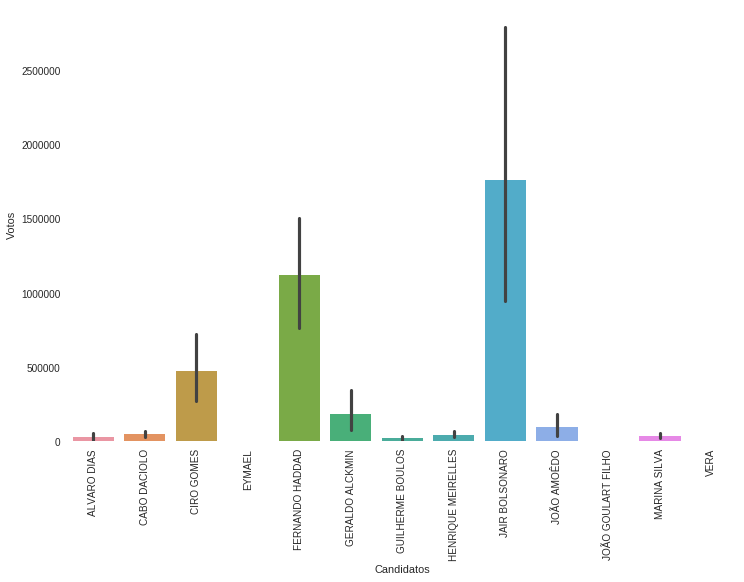

In [103]:
# Cria um gráfico contendo a quantidade de votos que cada presidenciavel obteve

fig = plt.figure(figsize=(12,8))
plt.tight_layout()
ax = sns.barplot(
    x=presidentes_por_estado["NM_URNA_CANDIDATO"],
    y=presidentes_por_estado["QT_VOTOS_NOMINAIS"],
    data=presidentes_por_estado
)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90)
plt.xlabel("Candidatos")
plt.ylabel("Votos")
plt.show()

Como é possível observar nesse gráfico, três candidatos (Ciro Gomes, Fernando Haddad e Jair Bolsonaro) mantém a maior quantidade de votos, com uma enorme diferença para os demais.

Por causa disso é interessante separar os presidenciáveis em duas categorias de visualização: uma para os com a maior quantidade de votos e outra para os demais. Com isso será possível entender melhor os resultados de candidatos como Eymael, João Goulart Filho e Vera, que nesse gráfico expressam nenhum valor significativo.

#3 - Presidentes por estado

Agora que temos uma noção melhor da nossa base, podemos gerar um gráfico para analisar os votos que cada presidenciável obteve classificados por estado (incluindo votos no exterior, que aparecem sobre a sigla ZZ).

Em tentativas anteriores, percebeu-se que o número de votos diferia muito e na hora de gerar os gráficos diferentes escalas eram aplicadas. Como uma forma de normalizar esses números, decidi por exibir a porcentagem de votos que cada candidato obteve nos estados, em vez do número "cru".

Para isso, inicialmente precisamos adquirir essa informação. O primeiro passo é saber quantos votos válidos cada estado teve:

In [154]:
# Cria um dataframe com a quantidade de votos por estado

votos_estado = presidentes_dataset.pivot_table(index="SG_UF", values="QT_VOTOS_NOMINAIS", aggfunc=np.sum)
votos_estado = votos_estado.rename(columns={'QT_VOTOS_NOMINAIS': 'TOTAL_VOTOS'})
votos_estado

,TOTAL_VOTOS
SG_UF,
AC,421778
AL,1535746
AM,1853591
AP,409757
BA,7368545
CE,4880155
DF,1604517
ES,2049148
GO,3264789


Com essa informação, podemos concatenar uma nova coluna no nosso conjunto de dados **presidentes_por_estado**, ficando mais fácil para visualizar e calcular a porcentagem depois.

In [155]:
# Concatena colunas para calcular a porcentagem dos votos por estado

presidentes_por_estado = pd.concat([presidentes_por_estado.set_index("SG_UF"), votos_estado], axis=1, join='inner')
presidentes_por_estado

,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,TOTAL_VOTOS
SG_UF,,,
AC,ALVARO DIAS,1531,421778
AL,ALVARO DIAS,5128,1535746
AM,ALVARO DIAS,8589,1853591
AP,ALVARO DIAS,1435,409757
BA,ALVARO DIAS,20838,7368545
CE,ALVARO DIAS,8142,4880155
DF,ALVARO DIAS,11138,1604517
ES,ALVARO DIAS,11352,2049148
GO,ALVARO DIAS,15628,3264789


Finalmente podemos calcular a porcentagem total de votos no estado que cada candidato obteve:

In [156]:
# Calcula a porcentagem de votos que cada candidato obteve por estado
presidentes_por_estado = presidentes_por_estado.assign(
    PORCENTAGEM_VTS_ESTADO=lambda x:round(100 * x["QT_VOTOS_NOMINAIS"]/x["TOTAL_VOTOS"],2)
)

# Exclui a coluna que foi utilizada para o cálculo, visto que suas informações podem confundir futuramente
presidentes_por_estado = presidentes_por_estado.drop(['TOTAL_VOTOS'], axis=1).reset_index()

presidentes_por_estado

,SG_UF,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,PORCENTAGEM_VTS_ESTADO
0,AC,ALVARO DIAS,1531,0.36
1,AL,ALVARO DIAS,5128,0.33
2,AM,ALVARO DIAS,8589,0.46
3,AP,ALVARO DIAS,1435,0.35
4,BA,ALVARO DIAS,20838,0.28
5,CE,ALVARO DIAS,8142,0.17
6,DF,ALVARO DIAS,11138,0.69
7,ES,ALVARO DIAS,11352,0.55
8,GO,ALVARO DIAS,15628,0.48
9,MA,ALVARO DIAS,6320,0.19


Agora é possível gerar gráficos para ver o desempenho de cada candidato por estado.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


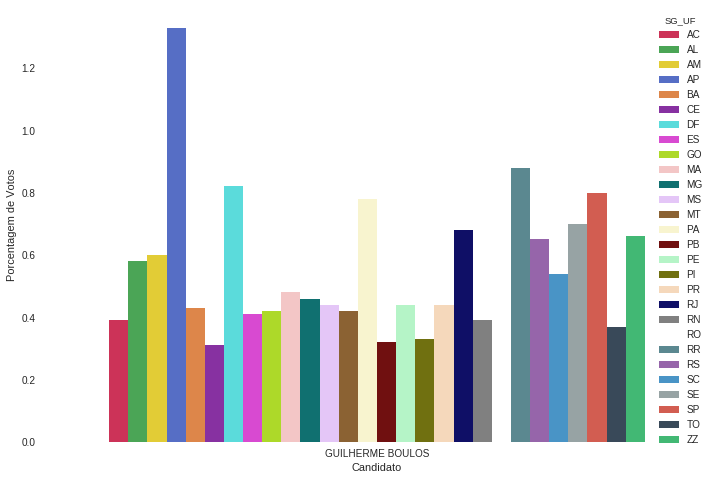

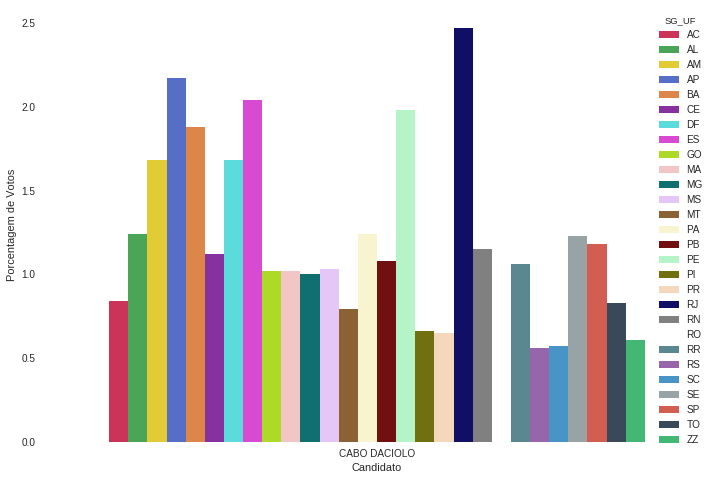

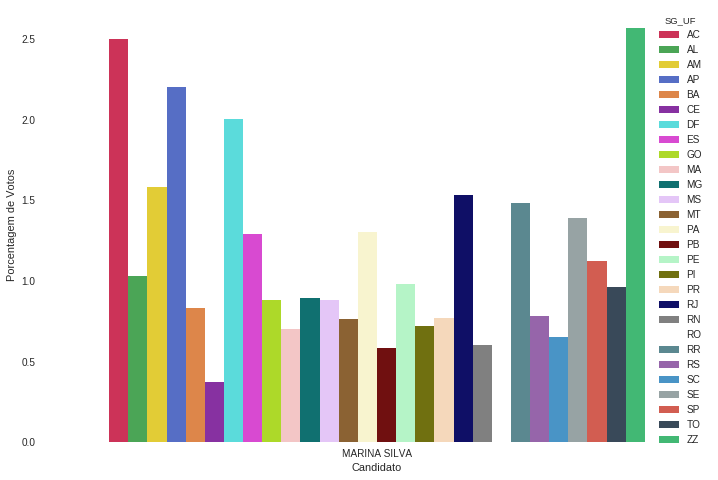

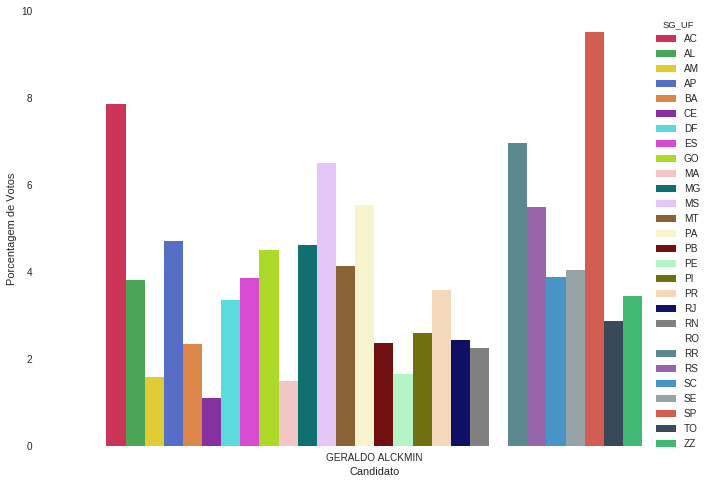

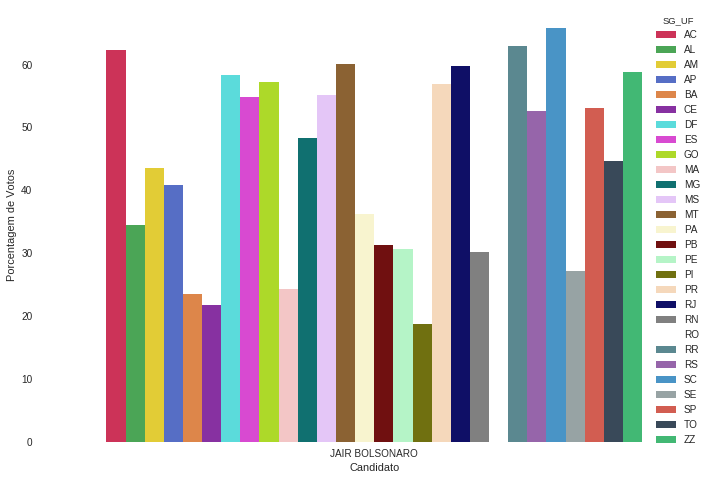

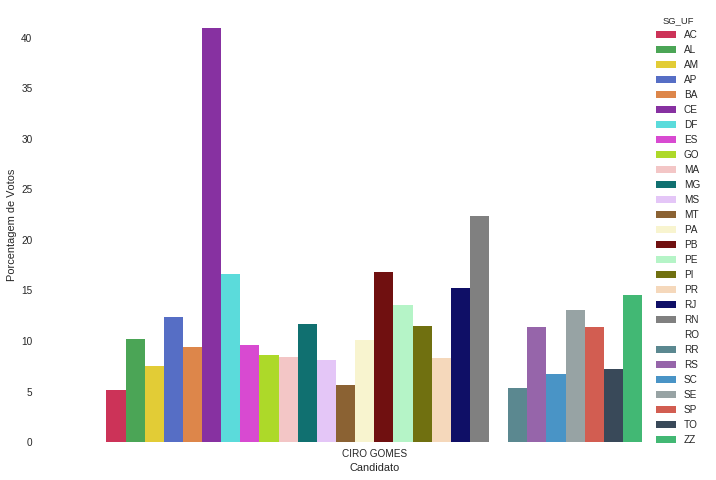

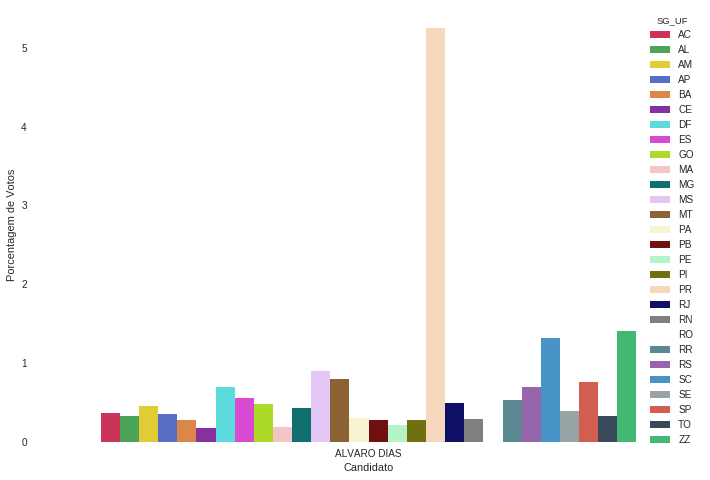

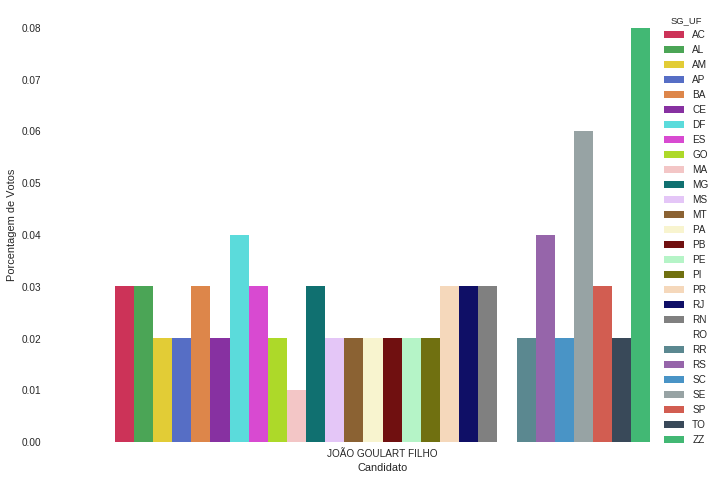

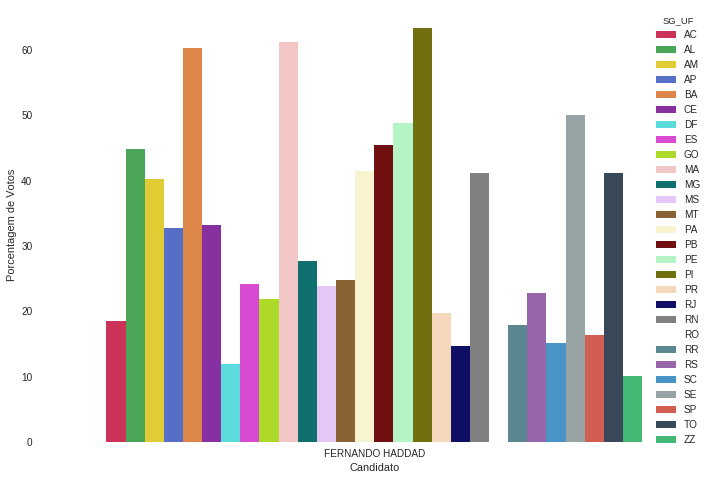

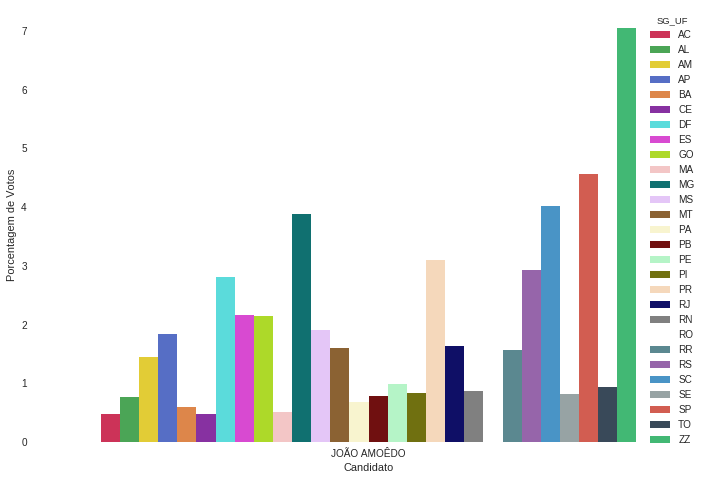

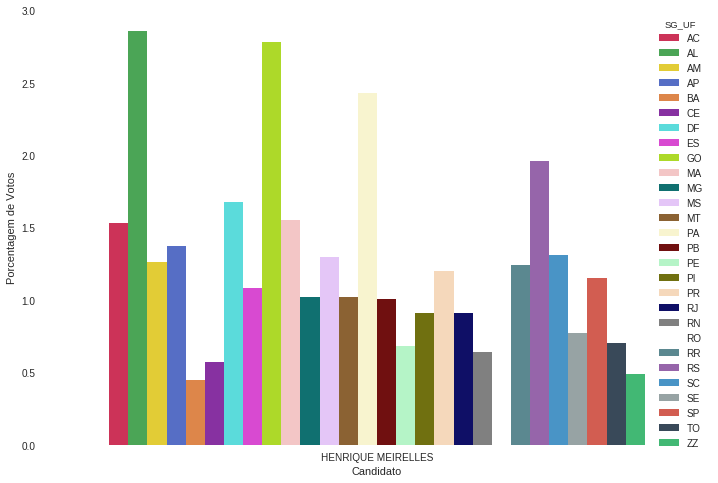

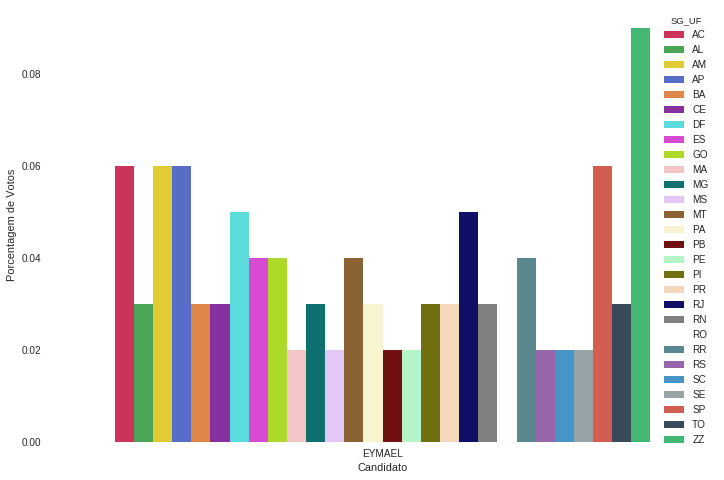

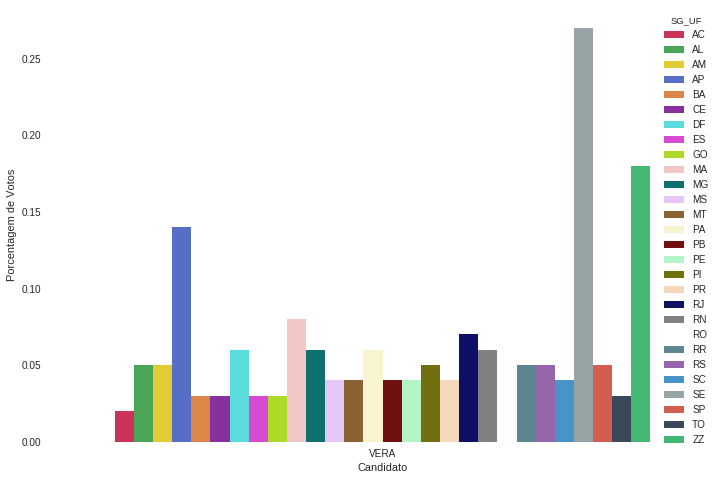

In [217]:
# Gera gráficos para ver o desempenho de cada candidato por estado

for presidente in presidentes_unique:
  fig = plt.figure(figsize=(12,8))
  plt.tight_layout()
  presidente_estado = presidentes_por_estado[presidentes_por_estado["NM_URNA_CANDIDATO"] == presidente]
  ax = sns.barplot(
    x=presidente_estado["NM_URNA_CANDIDATO"],
    y=presidente_estado["PORCENTAGEM_VTS_ESTADO"],
    hue=presidente_estado["SG_UF"],
    palette=my_colors
  )
  sns.despine(left=True, bottom=True)
  plt.xlabel("Candidato")
  plt.ylabel("Porcentagem de Votos")
  plt.show()

Como os gráficos foram gerados levando em conta a porcentagem dos votos no estado, é possível ter uma noção mais aguçada do cenário.

# 4 - Presidentes por região

Me interessei por saber quais foram a porcentagem de votos que os três mais votados candidatos receberam das cinco regiões do Brasil. De análises anteriores, já vimos que Fernando Haddad, Ciro Gomes e Jair Bolsonaro são os nomes a quais devemos procurar.

Inicialmente, precisamos classificar os estados do nosso conjunto de dados por região. Uma das formas para fazer isso é:

In [157]:
#Criando um dicionário com a região atribuída a cada estado
estado_regioes={
    'AC': ['NORTE'],
    'AL': ['NORDESTE'],
    'AM': ['NORTE'],
    'AP': ['NORTE'],
    'BA': ['NORDESTE'],
    'CE': ['NORDESTE'],
    'DF': ['CENTRO-OESTE'],
    'ES': ['SUDESTE'],
    'GO': ['CENTRO-OESTE'],
    'MA': ['NORDESTE'],
    'MG': ['SUDESTE'],
    'MS': ['CENTRO-OESTE'],
    'MT': ['CENTRO-OESTE'],
    'PA': ['NORTE'],
    'PB': ['NORDESTE'],
    'PE': ['NORDESTE'],
    'PI': ['NORDESTE'],
    'PR': ['SUL'],
    'RJ': ['SUDESTE'],
    'RN': ['NORDESTE'],
    'RO': ['NORTE'],
    'RR': ['NORTE'],
    'RS': ['SUL'],
    'SC': ['SUL'],
    'SE': ['NORDESTE'],
    'SP': ['SUDESTE'],
    'TO': ['NORTE'],
    'ZZ': ['EXTERIOR']
}

# Criando um dataframe a partir da lista de estados/regiões
regioes = pd.DataFrame.from_dict(estado_regioes).T.rename(columns={0: 'REGIAO'}).reset_index().rename(columns={'index': 'SG_UF'}).set_index('SG_UF')
regioes

,REGIAO
SG_UF,
AC,NORTE
AL,NORDESTE
AM,NORTE
AP,NORTE
BA,NORDESTE
CE,NORDESTE
DF,CENTRO-OESTE
ES,SUDESTE
GO,CENTRO-OESTE


Agora, podemos concatenar as colunas para conhecer também, além do estado, a região do voto. 

In [158]:
# Concatena as colunas para adicionar informação de região
presidentes_por_estado = pd.concat([presidentes_por_estado.set_index('SG_UF'), regioes], axis=1, join='inner')
presidentes_por_estado = presidentes_por_estado.reset_index()
presidentes_por_estado.head()

,SG_UF,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,PORCENTAGEM_VTS_ESTADO,REGIAO
0,AC,ALVARO DIAS,1531,0.36,NORTE
1,AL,ALVARO DIAS,5128,0.33,NORDESTE
2,AM,ALVARO DIAS,8589,0.46,NORTE
3,AP,ALVARO DIAS,1435,0.35,NORTE
4,BA,ALVARO DIAS,20838,0.28,NORDESTE


Porém, é necessário ainda saber a porcentagem que aqueles votos representam na região. Isso é feito da seguinte forma:

In [159]:
# Cria um dataframe com a quantidade de votos por região
votos_regiao = presidentes_por_estado.pivot_table(index="REGIAO", values="QT_VOTOS_NOMINAIS", aggfunc=np.sum)
votos_regiao = votos_regiao.rename(columns={'QT_VOTOS_NOMINAIS': 'TOTAL_VOTOS_REGIAO'})
votos_regiao

,TOTAL_VOTOS_REGIAO
REGIAO,
CENTRO-OESTE,7900387
EXTERIOR,193381
NORDESTE,28823653
NORTE,8726310
SUDESTE,44933034
SUL,16473908


Concatenando mais uma vez as informações para visualizar e calcular a porcentagem:

In [166]:
# Cria um novo conjunto de dados contendo a quantidade de votos do candidato por região
presidentes_por_regiao = presidentes_por_estado.pivot_table(
    index=["NM_URNA_CANDIDATO", "REGIAO"], values="QT_VOTOS_NOMINAIS", aggfunc=np.sum
)

presidentes_por_regiao = presidentes_por_regiao.reset_index()

# Concatena com a quantidade total de votos por região
presidentes_por_regiao = pd.concat([presidentes_por_regiao.set_index("REGIAO"), votos_regiao], axis=1, join='inner')

# Calcula a porcentagem desses votos em relação ao total 
presidentes_por_regiao = presidentes_por_regiao.assign(
    PORCENTAGEM_VTS_REGIAO=lambda x:round(100 * x["QT_VOTOS_NOMINAIS"]/x["TOTAL_VOTOS_REGIAO"],2)
)

# Exclui a coluna que foi utilizada para o cálculo, visto que suas informações podem confundir futuramente
presidentes_por_regiao = presidentes_por_regiao.drop(['TOTAL_VOTOS_REGIAO'], axis=1).reset_index()

presidentes_por_regiao

,REGIAO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,PORCENTAGEM_VTS_REGIAO
0,CENTRO-OESTE,ALVARO DIAS,52379,0.66
1,EXTERIOR,ALVARO DIAS,2733,1.41
2,NORDESTE,ALVARO DIAS,71208,0.25
3,NORTE,ALVARO DIAS,36643,0.42
4,SUDESTE,ALVARO DIAS,277561,0.62
5,SUL,ALVARO DIAS,419077,2.54
6,CENTRO-OESTE,CABO DACIOLO,87518,1.11
7,EXTERIOR,CABO DACIOLO,1172,0.61
8,NORDESTE,CABO DACIOLO,409796,1.42
9,NORTE,CABO DACIOLO,114128,1.31


Com os dados prontos, podemos plotar gráficos para ver a posição dos três candidatos com a maior quantidade de votos classificados por região.

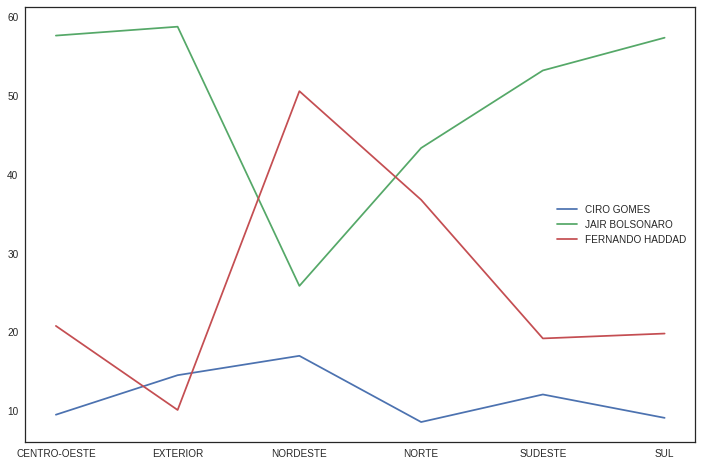

In [211]:
# Criando gráfico de votos por região (porcentagem) para os três candidatos com mais votos

haddad = presidentes_por_regiao[presidentes_por_regiao["NM_URNA_CANDIDATO"] == "FERNANDO HADDAD"].drop(['QT_VOTOS_NOMINAIS'], axis=1)
bolsonaro = presidentes_por_regiao[presidentes_por_regiao["NM_URNA_CANDIDATO"] == "JAIR BOLSONARO"].drop(['QT_VOTOS_NOMINAIS'], axis=1)
ciro = presidentes_por_regiao[presidentes_por_regiao["NM_URNA_CANDIDATO"] == "CIRO GOMES"].drop(['QT_VOTOS_NOMINAIS'], axis=1)

fig = plt.figure(figsize=(12,8))
plt.plot(ciro["REGIAO"], ciro["PORCENTAGEM_VTS_REGIAO"], label="CIRO GOMES")
plt.plot(bolsonaro["REGIAO"], bolsonaro["PORCENTAGEM_VTS_REGIAO"], label="JAIR BOLSONARO")
plt.plot(haddad["REGIAO"], haddad["PORCENTAGEM_VTS_REGIAO"], label="FERNANDO HADDAD")
plt.legend(loc='best')
plt.show()

Procurei observar, através do Censo 2010 do [IBGE](https://censo2010.ibge.gov.br/sinopse/index.php?dados=12) informações referentes a faixa etária da população para descobrir se havia alguma correlação idade e escolha dos candidatos. Como não tive acesso a uma base de dados para converter ao Pandas, não houve como gerar um gráfico de dispersão.

Apenas por análise visual dos gráficos do IBGE é possível notar que não há uma relação tão forte entre idade e a escolha do voto. No Nordeste, por exemplo, onde o candidato Fernando Haddad teve a maioria dos votos, a população é levemente mais jovem que no Sudeste, onde Jair Bolsonaro alcançou maioria.

Fatores políticos e sociais pesam bastante nessa escolha.

# 5 - Conclusão

A quantidade de trabalho para ser feito é bem maior do que a que realmente foi entregue. Houveram dificuldades para tratar os dados, escolher os gráficos e fazer as escolhas referentes ao que eu gostaria de pesquisar.

Aprendi muito durante todo o processo, vendo o quanto é árduo tratar os dados para deixá-los prontos para uma visualização.

Percebi também que o resultado final do primeiro turno das eleições presidenciais aproxima-se do que as pesquisas eleitorais previam.